# Bước 1: Làm sạch dữ liệu và Phân tích khám phá (EDA)

## Tóm tắt tổng quan
- **Dữ liệu gốc**: 541,909 giao dịch từ công ty bán lẻ UK (2010-2011)  
- **Sau làm sạch**: 397,924 giao dịch hợp lệ từ 4,372 khách hàng UK
- **Mục đích**: Chuẩn bị dữ liệu chất lượng cao cho phân khúc khách hàng

## Quy trình thực hiện

1. **Tải và hiểu dữ liệu** - Khám phá cấu trúc và chất lượng
2. **Làm sạch dữ liệu** - Loại bỏ giao dịch không hợp lệ  
3. **Phân tích EDA** - Tìm hiểu patterns và trends
4. **Trực quan hóa** - Visualize insights quan trọng
5. **Xuất dữ liệu sạch** - Chuẩn bị cho bước tiếp theo

## Về tập dữ liệu

**Nguồn**: Công ty bán lẻ trực tuyến UK chuyên quà tặng độc đáo  
**Thời gian**: 12/2010 - 12/2011  
**Phạm vi**: Giao dịch toàn cầu với focus vào thị trường UK

### Các trường dữ liệu chính:
| Trường | Mô tả | Ví dụ |
|---------|--------|--------|  
| `InvoiceNo` | Mã hóa đơn (6 chữ số) | 536365 |
| `StockCode` | Mã sản phẩm | 85123A |
| `Description` | Tên sản phẩm | WHITE HANGING HEART |
| `Quantity` | Số lượng mua | 6 |
| `InvoiceDate` | Thời gian giao dịch | 2010-12-01 08:26:00 |
| `UnitPrice` | Đơn giá (GBP) | 2.55 |
| `CustomerID` | ID khách hàng | 17850 |
| `Country` | Quốc gia | United Kingdom |

### Nhận xét về cấu trúc dữ liệu

- Dữ liệu gồm các giao dịch bán lẻ trực tuyến tại UK giai đoạn 2010–2011.
- Mỗi dòng tương ứng với một sản phẩm trong hóa đơn.
- Các trường dữ liệu bao gồm thông tin hóa đơn, sản phẩm, số lượng, giá bán và khách hàng.
- Dữ liệu phù hợp cho phân tích hành vi mua sắm và khai phá mẫu.


## Parameters 
Gán tham số để sử dụng cho papermill

In [5]:
# PARAMETERS (for papermill)

# Đường dẫn file dữ liệu gốc
DATA_PATH = "../data/raw/online_retail.csv"

# Tên country cần phân tích (mặc định: UK)
COUNTRY = "United Kingdom"

# Thư mục lưu dữ liệu đã xử lý
OUTPUT_DIR = "data/processed"

# Một số tham số EDA (nếu sau này muốn bật/tắt nhanh)
PLOT_REVENUE = True
PLOT_TIME_PATTERNS = True
PLOT_PRODUCTS = True
PLOT_CUSTOMERS = True
PLOT_RFM = True


In [12]:
visualizer = DataVisualizer()


C:\Users\ACER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\ACER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\ACER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


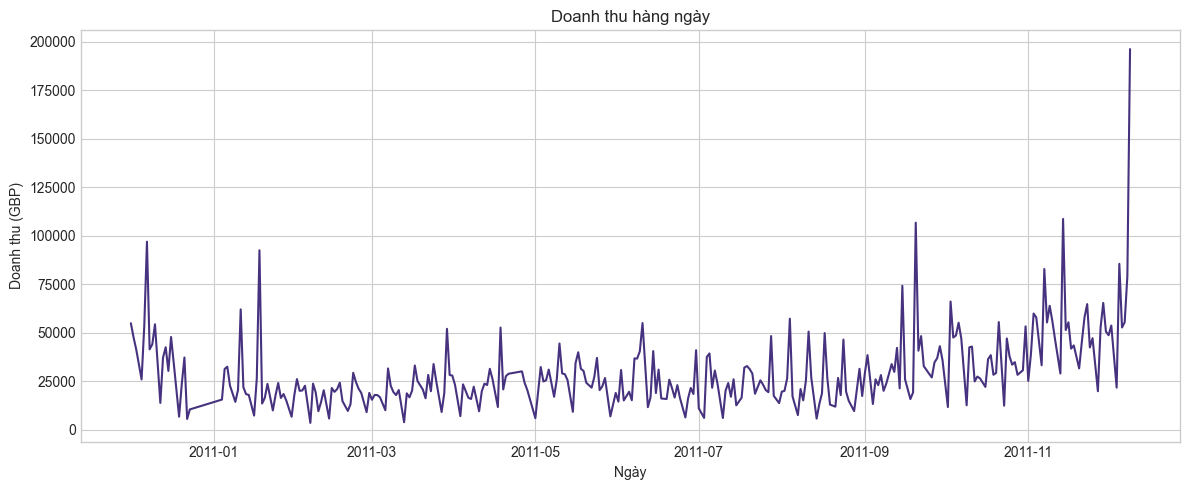

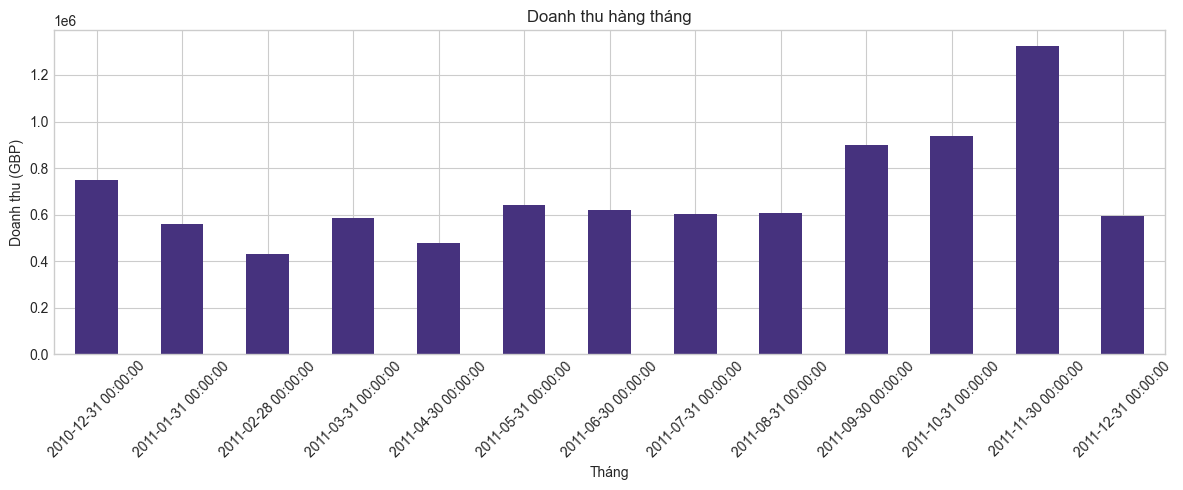

In [14]:
visualizer.plot_revenue_over_time(df_country)


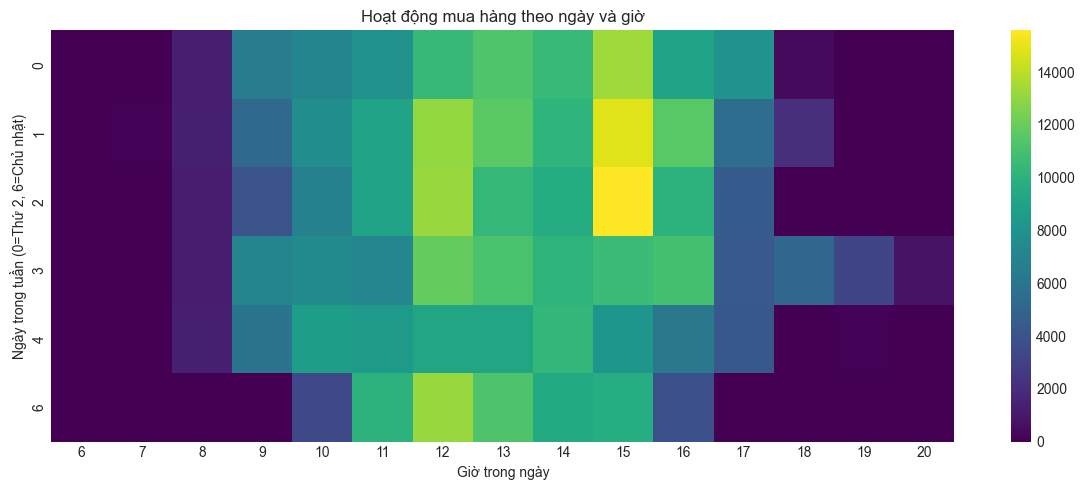

In [15]:
visualizer.plot_time_patterns(df_country)


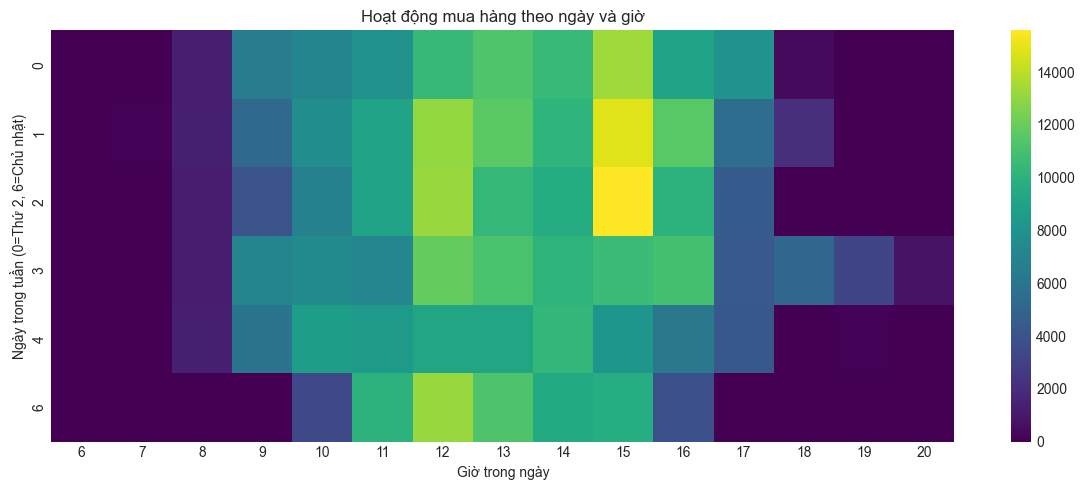

In [16]:
visualizer.plot_time_patterns(df_country)


### Mẫu thời gian giao dịch

- Mặc dù biểu đồ có hình dạng tương tự với biểu đồ doanh thu theo thời gian,
  nhưng hai biểu đồ phản ánh các khía cạnh khác nhau của dữ liệu.
- Biểu đồ này tập trung vào thói quen mua sắm lặp lại theo giờ trong ngày và ngày trong tuần.
- Kết quả cho thấy khách hàng có xu hướng mua sắm vào các khung giờ và ngày cố định.


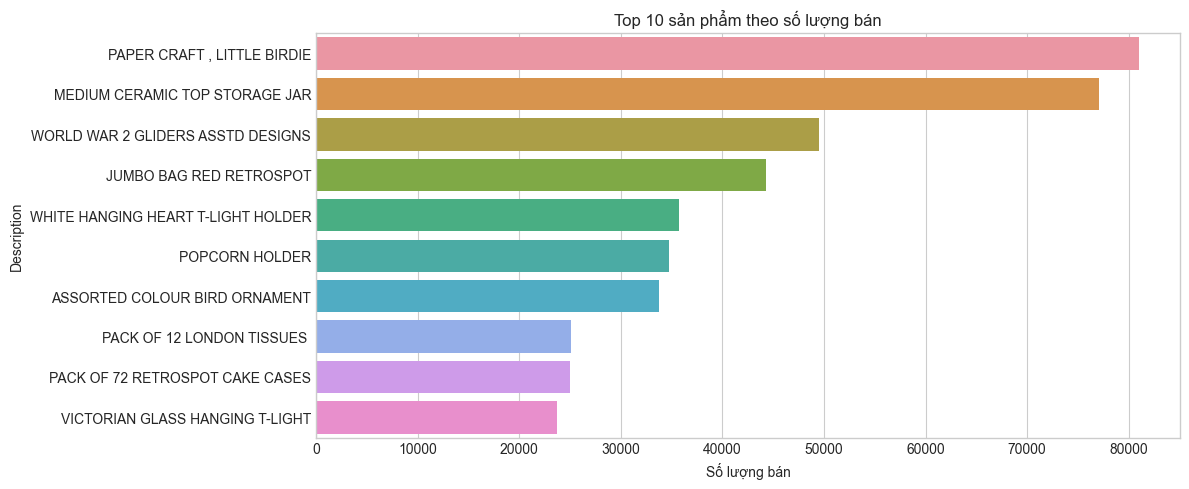

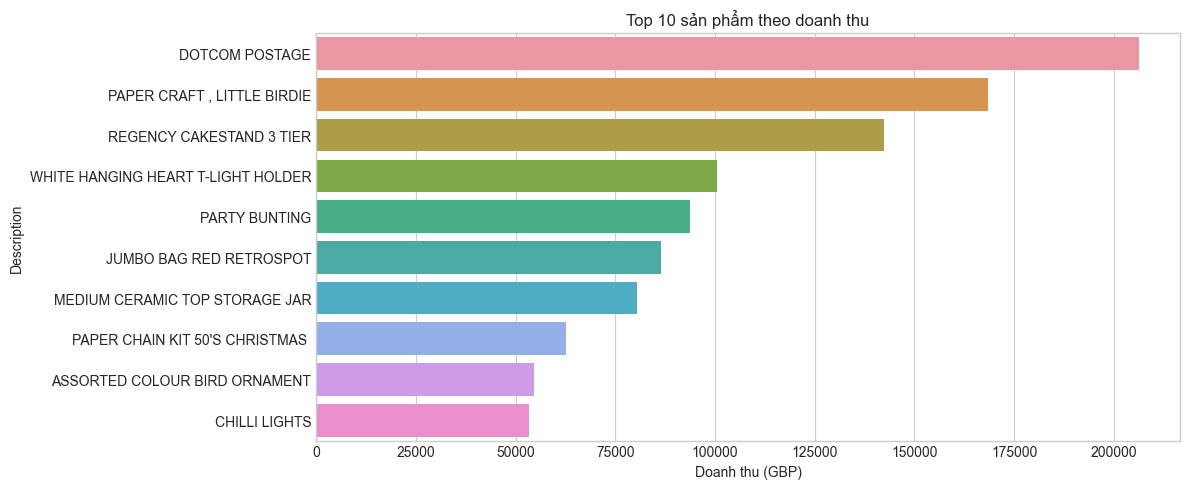

In [19]:
visualizer.plot_product_analysis(df_country)


### Phân tích sản phẩm

- Một số sản phẩm có tần suất xuất hiện cao hơn rõ rệt so với các sản phẩm khác.
- Nhu cầu của khách hàng tập trung vào một nhóm sản phẩm nhất định.


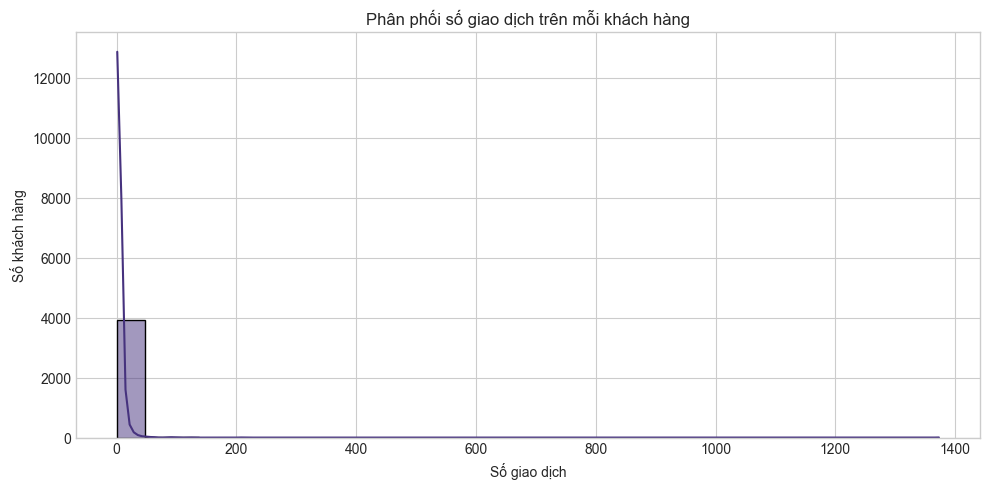

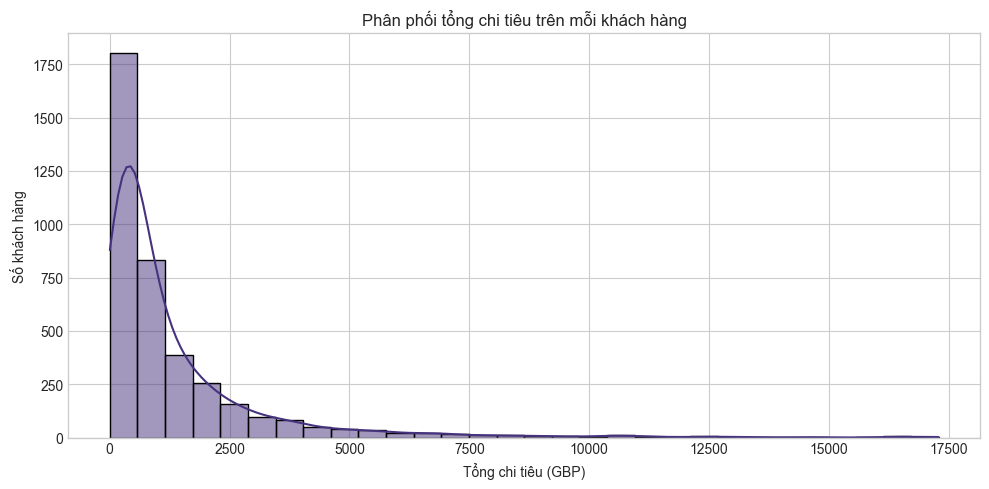

In [22]:
visualizer.plot_customer_distribution(df_country)


### Phân tích khách hàng

- Phân bố khách hàng cho thấy sự chênh lệch rõ rệt về mức độ mua sắm.
- Một nhóm nhỏ khách hàng có tần suất mua cao hơn phần còn lại.


In [28]:
snapshot_date = df_country["InvoiceDate"].max() + pd.Timedelta(days=1)


In [29]:
cleaner.compute_rfm(snapshot_date)


,CustomerID,Recency,Frequency,Monetary
0,000nan,1,1373,1716830.53
1,012346,326,1,77183.60
2,012747,2,11,4196.01
3,012748,1,209,33719.73
4,012749,4,5,4090.88
...,...,...,...,...
3916,018280,278,1,180.60
3917,018281,181,1,80.82
3918,018282,8,2,178.05
3919,018283,4,16,2094.88


In [30]:
rfm_df = cleaner.rfm_data
rfm_df.head()


,CustomerID,Recency,Frequency,Monetary
0,000nan,1,1373,1716830.53
1,012346,326,1,77183.60
2,012747,2,11,4196.01
3,012748,1,209,33719.73
4,012749,4,5,4090.88


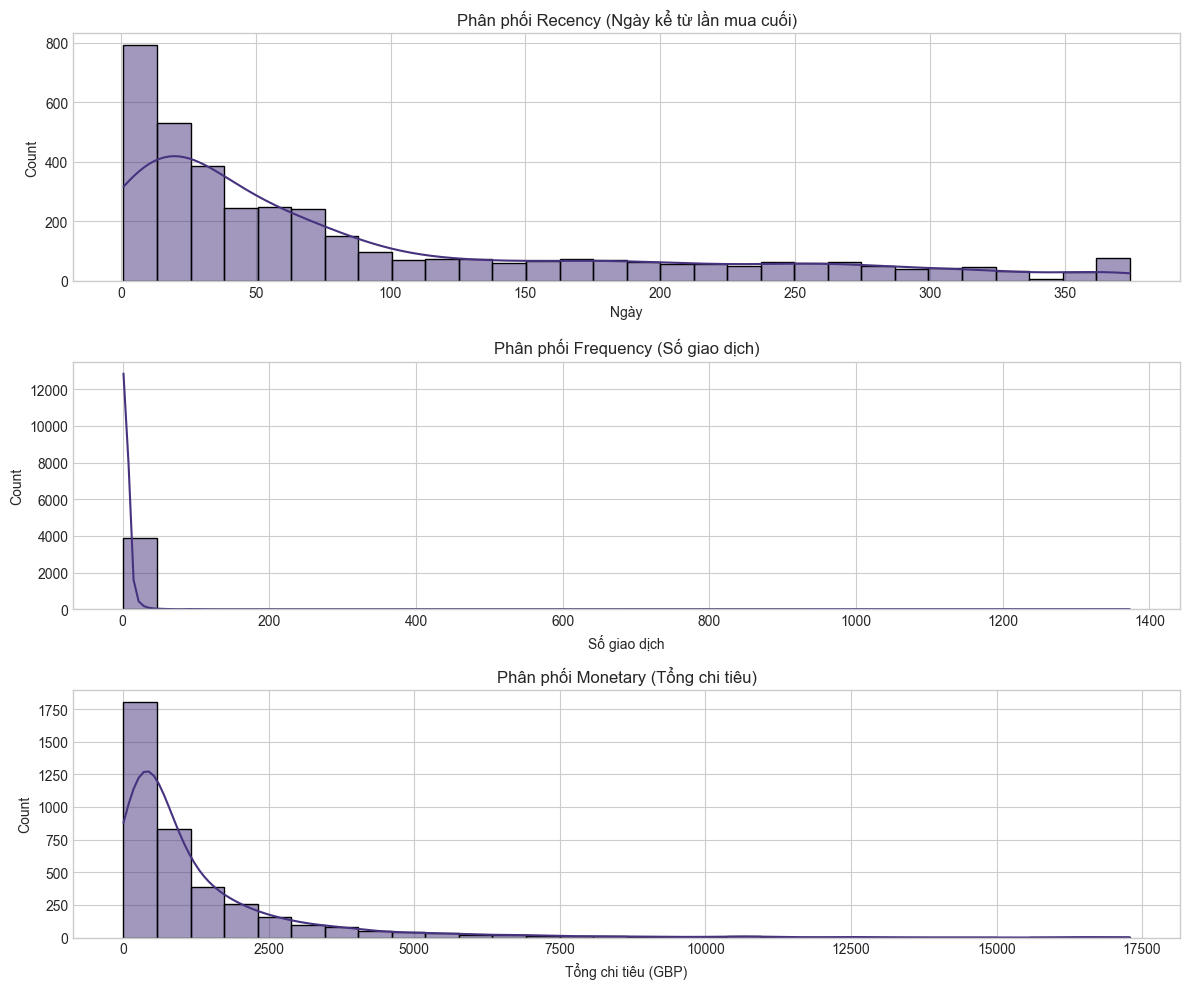

In [31]:
visualizer.plot_rfm_analysis(rfm_df)


### Phân tích RFM

- Recency phản ánh khoảng thời gian kể từ lần mua gần nhất của khách hàng.
- Frequency cho thấy đa số khách hàng mua với tần suất thấp.
- Monetary cho thấy doanh thu chủ yếu đến từ một nhóm khách hàng có giá trị cao.


## Nhận xét phân tích RFM

- **Recency**: Phần lớn khách hàng có Recency cao, cho thấy nhiều khách hàng đã lâu chưa quay lại mua hàng.
- **Frequency**: Đa số khách hàng có tần suất mua thấp, chỉ một nhóm nhỏ mua thường xuyên.
- **Monetary**: Doanh thu tập trung chủ yếu ở một số khách hàng có giá trị cao.

➡️ Điều này cho thấy doanh nghiệp nên tập trung chăm sóc nhóm khách hàng mua thường xuyên và có giá trị cao, đồng thời xây dựng chương trình khuyến mãi để kích hoạt lại nhóm khách hàng lâu chưa quay lại.


In [41]:
from mlxtend.frequent_patterns import apriori, association_rules

# 1️⃣ Chỉ giữ các giao dịch hợp lệ
df_apriori = df_country[
    (df_country["Quantity"] > 0) &
    (df_country["InvoiceNo"].astype(str).str.startswith("C") == False)
]

# 2️⃣ Tạo bảng basket (Invoice x Product)
basket = (
    df_apriori
    .groupby(["InvoiceNo", "Description"])["Quantity"]
    .sum()
    .unstack()
    .fillna(0)
)

# 3️⃣ Chuyển Quantity → True / False (BẮT BUỘC)
basket_bool = basket.applymap(lambda x: x > 0)

print("Kích thước basket:", basket_bool.shape)
basket_bool.head()

Kích thước basket: (18019, 4007)


Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536366,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536367,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536368,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536369,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
frequent_itemsets = apriori(
    basket_bool,
    min_support=0.02,
    use_colnames=True
)

print("Số frequent itemsets:", frequent_itemsets.shape[0])
frequent_itemsets.head()

Số frequent itemsets: 400


,support,itemsets
0,0.020145,(3 HOOK PHOTO SHELF ANTIQUE WHITE)
1,0.024252,(3 STRIPEY MICE FELTCRAFT)
2,0.021810,(4 TRADITIONAL SPINNING TOPS)
3,0.047450,(6 RIBBONS RUSTIC CHARM)
4,0.020589,(60 CAKE CASES DOLLY GIRL DESIGN)


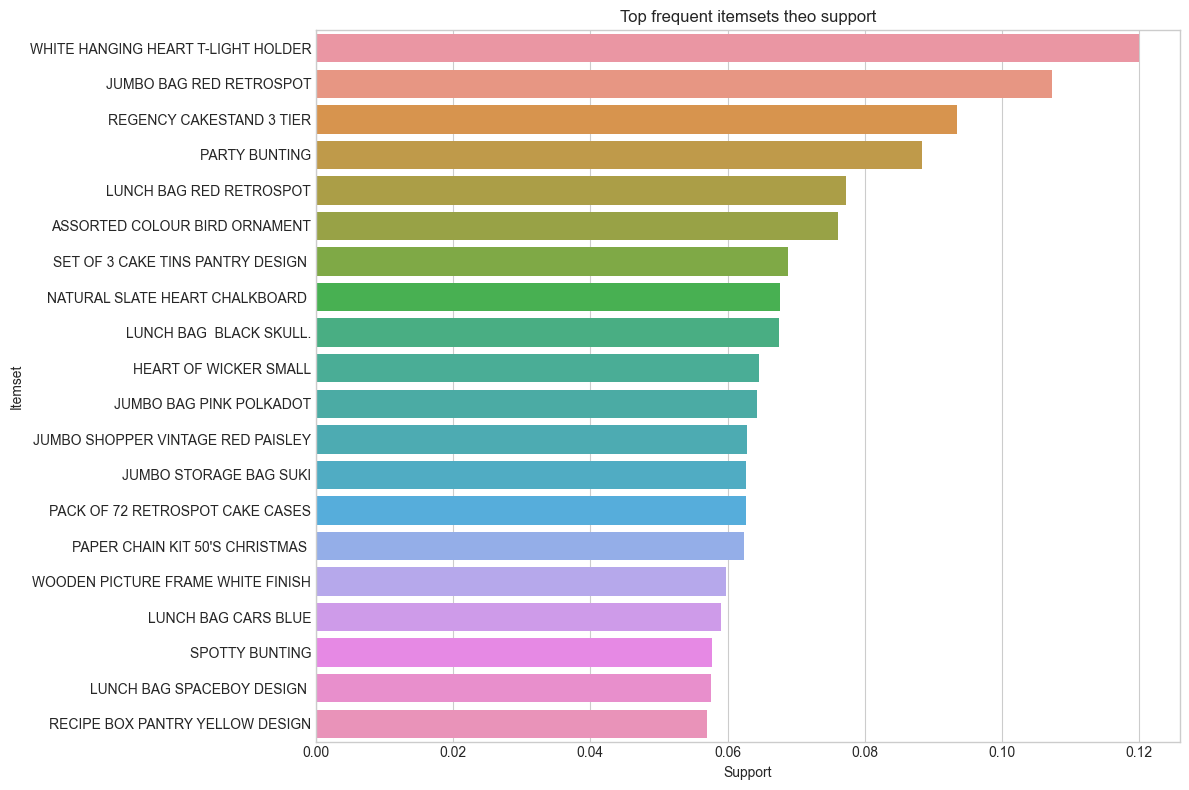

In [43]:
visualizer.plot_top_frequent_itemsets(frequent_itemsets)


In [47]:
from mlxtend.frequent_patterns import apriori, association_rules

basket = (
    df_country
    .groupby(["InvoiceNo", "Description"])["Quantity"]
    .sum()
    .unstack()
    .fillna(0)
)

basket = basket.applymap(lambda x: x > 0)

frequent_itemsets = apriori(
    basket,
    min_support=0.02,
    use_colnames=True
)

frequent_itemsets["length"] = frequent_itemsets["itemsets"].apply(len)
frequent_itemsets.head()


,support,itemsets,length
0,0.020145,(3 HOOK PHOTO SHELF ANTIQUE WHITE),1
1,0.024252,(3 STRIPEY MICE FELTCRAFT),1
2,0.021810,(4 TRADITIONAL SPINNING TOPS),1
3,0.047450,(6 RIBBONS RUSTIC CHARM),1
4,0.020589,(60 CAKE CASES DOLLY GIRL DESIGN),1


In [48]:
rules = association_rules(
    frequent_itemsets,
    metric="lift",
    min_threshold=1
)

rules = rules.sort_values("lift", ascending=False)
rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
192,(WOODEN HEART CHRISTMAS SCANDINAVIAN),(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.028248,0.026583,0.020423,0.722986,27.197263,1.0,0.019672,3.513966,0.991232,0.593548,0.715421,0.745627
193,(WOODEN STAR CHRISTMAS SCANDINAVIAN),(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.026583,0.028248,0.020423,0.768267,27.197263,1.0,0.019672,4.193416,0.989536,0.593548,0.761531,0.745627
199,(PINK REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",0.038959,0.038848,0.027305,0.700855,18.041001,1.0,0.025791,3.212994,0.982862,0.540659,0.688764,0.701856
194,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",(PINK REGENCY TEACUP AND SAUCER),0.038848,0.038959,0.027305,0.702857,18.041001,1.0,0.025791,3.234273,0.982748,0.540659,0.690812,0.701856
196,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.030246,0.051723,0.027305,0.902752,17.453534,1.0,0.025740,9.751148,0.972107,0.499492,0.897448,0.715325


In [51]:
rules["rule_str"] = rules.apply(
    lambda row: 
        f"{', '.join(list(row['antecedents']))} → {', '.join(list(row['consequents']))}",
    axis=1
)

rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,rule_str
192,(WOODEN HEART CHRISTMAS SCANDINAVIAN),(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.028248,0.026583,0.020423,0.722986,27.197263,1.0,0.019672,3.513966,0.991232,0.593548,0.715421,0.745627,WOODEN HEART CHRISTMAS SCANDINAVIAN → WOODEN S...
193,(WOODEN STAR CHRISTMAS SCANDINAVIAN),(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.026583,0.028248,0.020423,0.768267,27.197263,1.0,0.019672,4.193416,0.989536,0.593548,0.761531,0.745627,WOODEN STAR CHRISTMAS SCANDINAVIAN → WOODEN HE...
199,(PINK REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",0.038959,0.038848,0.027305,0.700855,18.041001,1.0,0.025791,3.212994,0.982862,0.540659,0.688764,0.701856,PINK REGENCY TEACUP AND SAUCER → ROSES REGENCY...
194,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",(PINK REGENCY TEACUP AND SAUCER),0.038848,0.038959,0.027305,0.702857,18.041001,1.0,0.025791,3.234273,0.982748,0.540659,0.690812,0.701856,"ROSES REGENCY TEACUP AND SAUCER , GREEN REGENC..."
196,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.030246,0.051723,0.027305,0.902752,17.453534,1.0,0.025740,9.751148,0.972107,0.499492,0.897448,0.715325,"PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY ..."


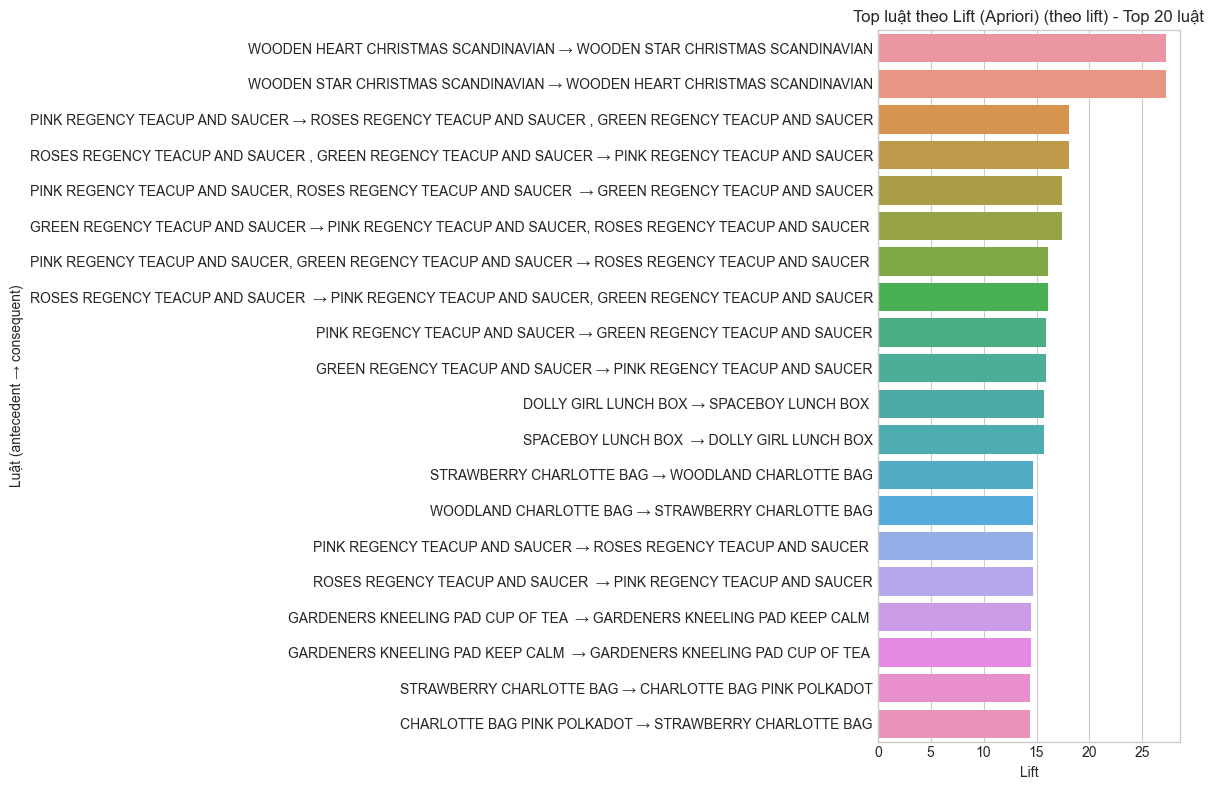

In [52]:
visualizer.plot_top_rules_lift(rules)


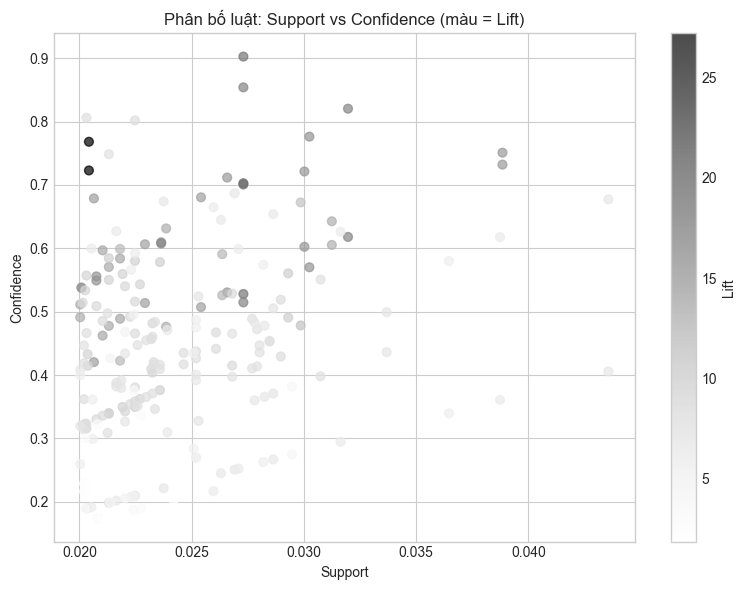

In [53]:
visualizer.plot_rules_support_confidence_scatter(rules)


📌 KẾT LUẬN PHÂN TÍCH GIỎ HÀNG (ASSOCIATION RULE MINING)

Qua phân tích Apriori trên dữ liệu giao dịch bán lẻ, mô hình đã tìm ra các tập sản phẩm thường xuyên được mua cùng nhau.

Các luật kết hợp có confidence cao (> 0.5) cho thấy khả năng sản phẩm B được mua khi đã mua sản phẩm A là khá lớn.

Một số luật có lift lớn (> 5) cho thấy mối quan hệ mua kèm mạnh hơn so với ngẫu nhiên, phù hợp để áp dụng vào gợi ý sản phẩm.

Biểu đồ Support vs Confidence cho thấy phần lớn luật có support thấp nhưng confidence tương đối cao, điều này phù hợp với dữ liệu bán lẻ có số lượng sản phẩm lớn.

Kết quả phân tích có thể được ứng dụng trong:

Gợi ý sản phẩm (cross-selling)

Thiết kế combo sản phẩm

Tối ưu trưng bày sản phẩm trong cửa hàng

## Set up

In [6]:
%load_ext autoreload
%autoreload 2

import os
import sys

# Xác định project_root linh hoạt
cwd = os.getcwd()
if os.path.basename(cwd) == "notebooks":
    # Đang chạy từ thư mục notebooks
    project_root = os.path.abspath("..")
else:
    # Đang chạy từ root project (papermill, VSCode, v.v.)
    project_root = cwd

src_path = os.path.join(project_root, "src")
if src_path not in sys.path:
    sys.path.append(src_path)

from apriori_library import DataCleaner, DataVisualizer 

import pandas as pd
import matplotlib.pyplot as plt



In [7]:
# Khởi tạo DataVisualizer với style đã cấu hình
visualizer = DataVisualizer()

## Tải dữ liệu

In [8]:
# Đọc dữ liệu gốc
cleaner = DataCleaner(DATA_PATH)
df = cleaner.load_data()

# Hiển thị 5 dòng đầu tiên
df.head()


Data shape: (541909, 8)
Number of records: 541,909


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,017850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,017850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,017850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,017850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,017850,United Kingdom


In [9]:
print("Thông tin về tập dữ liệu Online retail:")

print(f"- Kích thước dữ liệu: {df.shape[0]:,} dòng và {df.shape[1]:} cột")

missing_values = df.isnull().sum().sum()
print(f"- Tổng số giá trị thiếu: {missing_values:,} ô")

print(f"- Khách hàng duy nhất (bao gồm cả NaN): {df['CustomerID'].nunique(dropna=True):,} khách hàng")

df.info()


Thông tin về tập dữ liệu Online retail:
- Kích thước dữ liệu: 541,909 dòng và 8 cột
- Tổng số giá trị thiếu: 1,454 ô
- Khách hàng duy nhất (bao gồm cả NaN): 4,373 khách hàng
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


## Làm sạch dữ liệu
Ta thực hiện làm sạch dữ liệu theo các bước:
### 1. Loại bỏ các hoá đơn bị huỷ
### 2. Tập trung vào khách hàng UK only
### 3. Loại bỏ bản ghi có quantity hoặc price không hợp lệ

In [10]:
# Làm sạch dữ liệu cho country được chọn
df_country = cleaner.clean_data()  

# Tạo time features
cleaner.create_time_features()

print("\nThông tin về tập dữ liệu sau khi làm sạch:")
print(f"- Dữ liệu gốc: {df.shape[0]:,} giao dịch")
print(f"- Dữ liệu sau làm sạch ({COUNTRY}): {df_country.shape[0]:,} giao dịch")
print(f"- Loại bỏ: {df.shape[0] - df_country.shape[0]:,} giao dịch "
      f"({((df.shape[0] - df_country.shape[0]) / df.shape[0] * 100):.1f}%)")
print(f"- Khách hàng {COUNTRY}: {df_country['CustomerID'].nunique():,}")

df_country.head()



Thông tin về tập dữ liệu sau khi làm sạch:
- Dữ liệu gốc: 541,909 giao dịch
- Dữ liệu sau làm sạch (United Kingdom): 485,123 giao dịch
- Loại bỏ: 56,786 giao dịch (10.5%)
- Khách hàng United Kingdom: 3,921


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,HourOfDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,017850,United Kingdom,15.30,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,017850,United Kingdom,20.34,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,017850,United Kingdom,22.00,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,017850,United Kingdom,20.34,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,017850,United Kingdom,20.34,2,8


### Làm sạch dữ liệu

- Tập dữ liệu ban đầu có 541,909 giao dịch.
- Sau khi làm sạch và lọc theo United Kingdom, còn lại 485,123 giao dịch (giảm khoảng 10.5%).
- Các giao dịch bị loại bỏ chủ yếu do số lượng âm, giá bằng 0 hoặc thiếu thông tin khách hàng.
- Quá trình làm sạch cũng tạo thêm các đặc trưng mới như tổng giá trị giao dịch (TotalPrice), ngày trong tuần và giờ giao dịch.


In [ ]:
# Phân tích doanh thu theo thời gian
if PLOT_REVENUE:
    visualizer.plot_revenue_over_time(df_country)


In [ ]:
# Phân tích mẫu thời gian mua hàng 
if PLOT_TIME_PATTERNS:
    visualizer.plot_time_patterns(df_country)


In [ ]:
# Phân tích các sản phẩm bán chạy nhất
if PLOT_PRODUCTS:
    visualizer.plot_product_analysis(df_country, top_n=10)


In [ ]:
# Phân phối hành vi khách hàng
if PLOT_CUSTOMERS:
    visualizer.plot_customer_distribution(df_country)

In [ ]:
# Phân tích chi tiêu của khách hàng
spend_per_customer = df_country.groupby('CustomerID')['TotalPrice'].sum()
transactions_per_customer = df_country.groupby("CustomerID")["InvoiceNo"].nunique()

print("Phân tích hành vi khách hàng:")
print(f"- Chi tiêu trung bình: £{spend_per_customer.mean():.2f}")
print(f"- Chi tiêu median: £{spend_per_customer.median():.2f}")
print(f"- Giao dịch trung bình: {transactions_per_customer.mean():.1f} lần")

spend_per_customer.describe()

### Phân tích RFM

Recency (Gần đây): Khách hàng mua hàng lần cuối cách đây bao lâu?

Frequency (Tần suất): Họ mua hàng thường xuyên như thế nào?

Monetary (Tiền tệ): Họ chi tiêu bao nhiều tiền?

In [ ]:
# Tính toán các chỉ số RFM (Recency, Frequency, Monetary) cho tập {COUNTRY}
rfm_data = cleaner.compute_rfm()

print("Phân tích RFM:")
print(f"- Trung bình Recency: {rfm_data['Recency'].mean():.0f} ngày")
print(f"- Trung bình Frequency: {rfm_data['Frequency'].mean():.1f} giao dịch")
print(f"- Trung bình Monetary: £{rfm_data['Monetary'].mean():.2f}")

rfm_data.head(10)


In [ ]:
# Trực quan hoá phân phối RFM
if PLOT_RFM:
    visualizer.plot_rfm_analysis(rfm_data)

In [ ]:
# Lưu dữ liệu đã làm sạch
cleaner.save_cleaned_data(output_dir=OUTPUT_DIR)

print("Dữ liệu đã được lưu thành công:")
print(f"- Thư mục: {OUTPUT_DIR}")
print("- File: cleaned_uk_data.csv")
print(f"- Kích thước: {df_country.shape[0]:,} dòng")
print("- Sẵn sàng cho bước feature engineering / association rules")
